In [1]:
atletas = ['alirio helio wagner fernando_mineiro fred duda marcellus julio_cesar daniel jefferson_william ian coloneze babby',
           'arthur estevam valtinho alex_garcia giovannoni rodrigo rossi nezinho marcio_cipriano mineiro',
           'arthur luiz_gustavo fabio alex_garcia giovannoni rafael rossi nezinho bruninho marcio_cipriano bruno alirio tischer',
           'arthur ronald fabio alex_garcia giovannoni rossi nezinho bruninho marcio_cipriano bruno alirio tischer',
           'marcelinho feliz shilton kojo benite chupeta duda marquinhos diego_marques caio_torres alexandre olivinha gege douglas zanotti',
           'marcelinho danielzinho shilton laprovittola benite chupeta marquinhos diego_marques leo washam olivinha alef gege douglas felicio stafleu meyinsse',
           'hermann marcelinho danielzinho laprovittola benite chupeta dede marquinhos diego leo olivinha alef gege felicio fernando mingau caique gigante meyinsse',
           'marcelinho rafa_luz gigante ramon marquinhos rafael_mineiro jp_batista danielzinho olivinha gege mingau robinson meyinsse',
           'gui_deodato shilton stefano valtinho alex_garcia jefferson henrique michael gege gui_santos leo_meindl gabriel_jau',
           'yago elinho jhonatan_luz lucas_dias victor_andre kyle_fuller alex du_sommer deryk dikembe david_nesbitt eddy guilherme_hubner',
           'balbi rossetto matheusinho joao_matheus deryk kevin marquinhos jhonathan_luz aieser olivinha nesbitt ruan_miranda varejao rafael_mineiro joao_vitor']

times = ['Flamengo', 'Brasilia','Brasilia','Brasilia','Flamengo','Flamengo','Flamengo','Flamengo','Bauru','Paulistano',
         'Flamengo']

tecnicos =['chupeta_coach','lula_ferreira','jose_vidal','jose_vidal','jose_neto','jose_neto','jose_neto','jose_neto',
           'demetrius','gustavo_conti','gustavo_conti']

temporadas = ['2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19']

In [2]:
import pandas as pd
import numpy as np

In [6]:
corpus_df =pd.DataFrame([temporadas, times, tecnicos, atletas]).T
corpus_df

,0,1,2,3
0,2008-09,Flamengo,chupeta_coach,alirio helio wagner fernando_mineiro fred duda...
1,2009-10,Brasilia,lula_ferreira,arthur estevam valtinho alex_garcia giovannoni...
2,2010-11,Brasilia,jose_vidal,arthur luiz_gustavo fabio alex_garcia giovanno...
3,2011-12,Brasilia,jose_vidal,arthur ronald fabio alex_garcia giovannoni ros...
4,2012-13,Flamengo,jose_neto,marcelinho feliz shilton kojo benite chupeta d...
5,2013-14,Flamengo,jose_neto,marcelinho danielzinho shilton laprovittola be...
6,2014-15,Flamengo,jose_neto,hermann marcelinho danielzinho laprovittola be...
7,2015-16,Flamengo,jose_neto,marcelinho rafa_luz gigante ramon marquinhos r...
8,2016-17,Bauru,demetrius,gui_deodato shilton stefano valtinho alex_garc...
9,2017-18,Paulistano,gustavo_conti,yago elinho jhonatan_luz lucas_dias victor_and...


In [10]:
import nltk
import re

In [11]:
# preprocessor that focuses on removing special characters, extra whitespace, digits, stopwords, and then lowercasing
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lowercas and remove special character\whitespace
    doc = re.sub('r[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [12]:
# apply it to sample corpus
norm_corpus = normalize_corpus(atletas)
norm_corpus

array(['alirio helio wagner fernando_mineiro fred duda marcellus julio_cesar daniel jefferson_william ian coloneze babby',
       'arthur estevam valtinho alex_garcia giovannoni rodrigo rossi nezinho marcio_cipriano mineiro',
       'arthur luiz_gustavo fabio alex_garcia giovannoni rafael rossi nezinho bruninho marcio_cipriano bruno alirio tischer',
       'arthur ronald fabio alex_garcia giovannoni rossi nezinho bruninho marcio_cipriano bruno alirio tischer',
       'marcelinho feliz shilton kojo benite chupeta duda marquinhos diego_marques caio_torres alexandre olivinha gege douglas zanotti',
       'marcelinho danielzinho shilton laprovittola benite chupeta marquinhos diego_marques leo washam olivinha alef gege douglas felicio stafleu meyinsse',
       'hermann marcelinho danielzinho laprovittola benite chupeta dede marquinhos diego leo olivinha alef gege felicio fernando mingau caique gigante meyinsse',
       'marcelinho rafa_luz gigante ramon marquinhos rafael_mineiro jp_batista 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# get bag of words features in sparse format
cv= CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<11x96 sparse matrix of type '<class 'numpy.int64'>'
	with 152 stored elements in Compressed Sparse Row format>

In [15]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 5)	1
  (0, 43)	1
  (0, 92)	1
  (0, 34)	1
  (0, 35)	1
  (0, 26)	1
  (0, 64)	1
  (0, 54)	1
  (0, 16)	1
  (0, 48)	1
  (0, 46)	1
  (0, 15)	1
  (0, 7)	1
  (1, 6)	1
  (1, 29)	1
  (1, 89)	1
  (1, 3)	1
  (1, 39)	1
  (1, 80)	1
  (1, 83)	1
  (1, 73)	1
  (1, 65)	1
  (1, 70)	1
  (2, 5)	1
  (2, 6)	1
  :	:
  (9, 61)	1
  (9, 91)	1
  (9, 57)	1
  (9, 2)	1
  (9, 25)	1
  (9, 20)	1
  (9, 23)	1
  (9, 18)	1
  (9, 27)	1
  (9, 42)	1
  (10, 66)	1
  (10, 74)	1
  (10, 77)	1
  (10, 20)	1
  (10, 8)	1
  (10, 82)	1
  (10, 67)	1
  (10, 51)	1
  (10, 55)	1
  (10, 50)	1
  (10, 0)	1
  (10, 72)	1
  (10, 84)	1
  (10, 90)	1
  (10, 52)	1


In [16]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns = vocab)

,aieser,alef,alex,alex_garcia,alexandre,alirio,arthur,babby,balbi,benite,...,stafleu,stefano,tischer,valtinho,varejao,victoandre,wagner,washam,yago,zanotti
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [18]:
# Constructing a co-occurrence matrix in python pandas ********************************************************************
# https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas
df = pd.DataFrame(cv_matrix, columns = vocab)
df_asint = df.astype(int)
coocc = df_asint.T.dot(df_asint)
coocc
# *************************************************************************************************************************

,aieser,alef,alex,alex_garcia,alexandre,alirio,arthur,babby,balbi,benite,...,stafleu,stefano,tischer,valtinho,varejao,victoandre,wagner,washam,yago,zanotti
aieser,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
alef,0,2,0,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,1,0,0
alex,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
alex_garcia,0,0,0,4,0,2,3,0,0,0,...,0,1,2,2,0,0,0,0,0,0
alexandre,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
victoandre,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
wagner,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
washam,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
yago,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [19]:
# Reset diagonal
np.fill_diagonal(coocc.values, 0)
coocc

,aieser,alef,alex,alex_garcia,alexandre,alirio,arthur,babby,balbi,benite,...,stafleu,stefano,tischer,valtinho,varejao,victoandre,wagner,washam,yago,zanotti
aieser,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
alef,0,0,0,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,1,0,0
alex,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
alex_garcia,0,0,0,0,0,2,3,0,0,0,...,0,1,2,2,0,0,0,0,0,0
alexandre,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
victoandre,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
wagner,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
washam,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
yago,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
G = nx.MultiGraph(coocc)

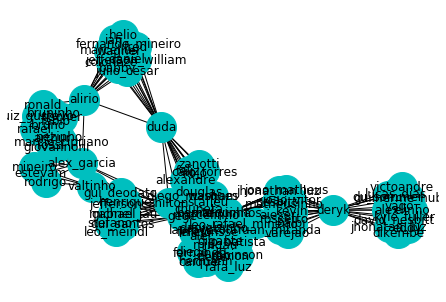

In [36]:
nx.draw(G, node_color='c', node_size=900, with_labels=True)

(array([33.,  6.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  1.45,  2.9 ,  4.35,  5.8 ,  7.25,  8.7 , 10.15, 11.6 ,
        13.05, 14.5 , 15.95, 17.4 , 18.85, 20.3 , 21.75, 23.2 , 24.65,
        26.1 , 27.55, 29.  ]),
 <a list of 20 Patch objects>)

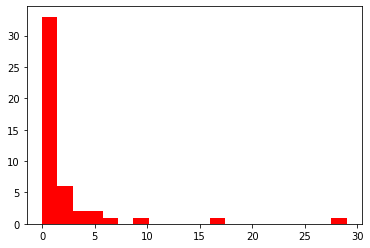

In [37]:
hst = nx.degree_histogram(G)
plt.hist(hst,bins=20,color='red')

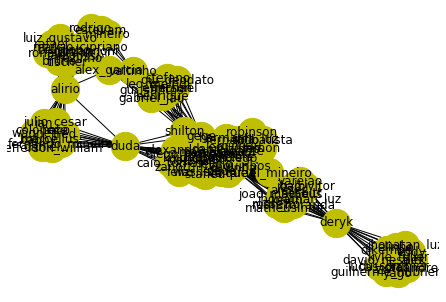

In [38]:
nx.draw(G, with_labels=True,node_color='y',node_size=800)

In [41]:
import networkx as nx
from networkx.algorithms import bipartite

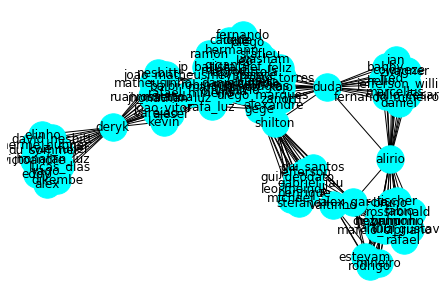

In [42]:
B = nx.Graph(coocc)
nx.draw(B, with_labels = True, node_color = 'cyan', node_size = 750)

In [43]:
social = nx.Graph(coocc)

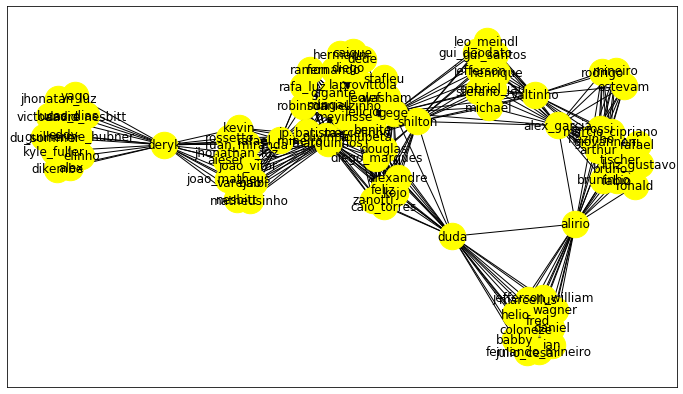

In [46]:
plt.figure(figsize = (12,7))
nx.draw_networkx(social, node_color = 'yellow', node_size = 700, with_labels = True)

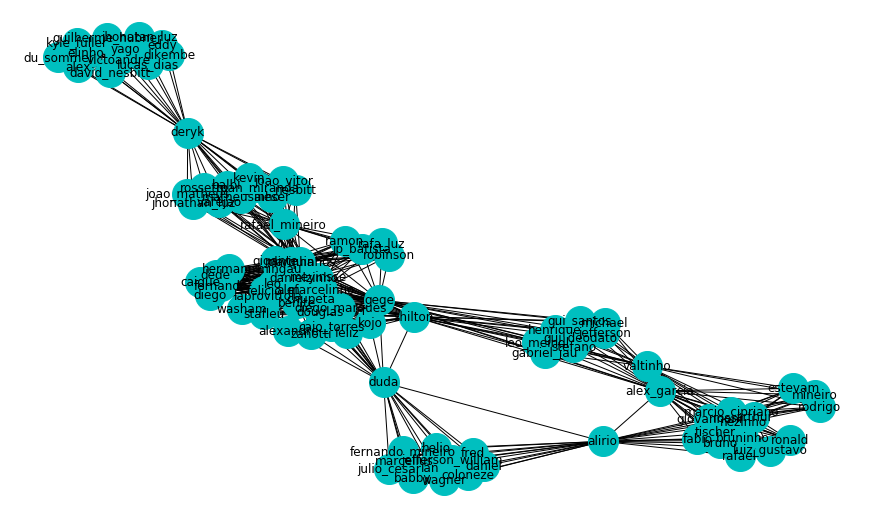

In [47]:
plt.figure(figsize = (12,7))
nx.draw(social,node_color='c',node_size=900, with_labels=True)

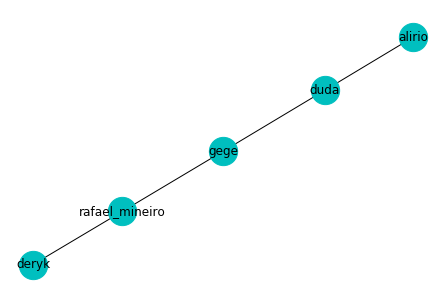

In [59]:
sub = nx.subgraph(social,['duda','alirio','gege','deryk','rafael_mineiro'])
nx.draw(sub,node_color='c', node_size = 800, with_labels= True)

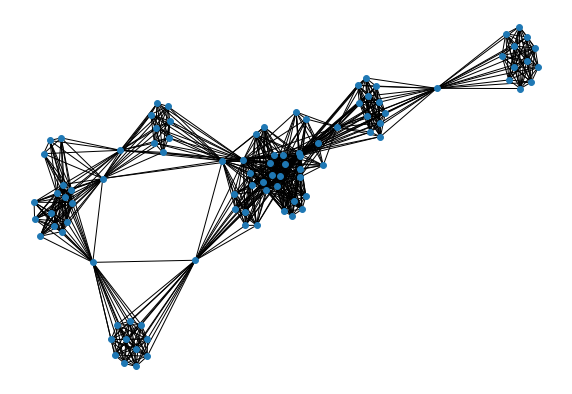

In [64]:
# create a spring-layout of fb
pos = nx.spring_layout(social)

plt.figure(figsize = (10,7))

plt.axis('off')
nx.draw_networkx(social, pos=pos,with_labels=False, node_size=35)

In [70]:
pairs = social.edges

In [71]:
import operator
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(),key=operator.itemgetter(1))

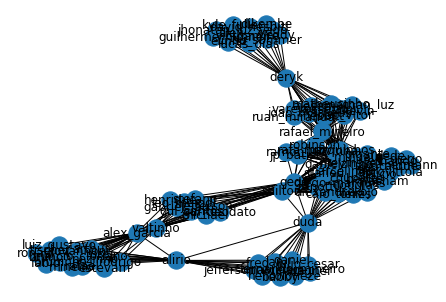

In [72]:
g = nx.Graph()
g.add_edges_from(pairs)

nx.draw(g, with_labels=True)

In [73]:
#centrality : which nodes have the highest /lowest degree centrality

degree_cent = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_cent)

print('----------------------Degree Centrality--------------------------')
print('Highest degree:',degree_sorted[-5:])
print('\n')

print('Lowest degree:',degree_sorted[:5])

----------------------Degree Centrality--------------------------
Highest degree: [('shilton', 0.3368421052631579), ('marcelinho', 0.35789473684210527), ('gege', 0.4631578947368421), ('marquinhos', 0.4842105263157895), ('olivinha', 0.4842105263157895)]


Lowest degree: [('estevam', 0.09473684210526316), ('mineiro', 0.09473684210526316), ('rodrigo', 0.09473684210526316), ('gabriel_jau', 0.11578947368421053), ('gui_deodato', 0.11578947368421053)]


In [74]:
#betweenness centrality : which nodes have the highest /lowest betweenness centrality

between_cent = nx.betweenness_centrality(g)
between_sorted = centrality_sort(between_cent)

print('----------------------Betwenness Centrality--------------------------')
print('Highest degree:',between_sorted[-5:])
print('\n')

print('Lowest degree:',between_sorted[:5])

----------------------Betwenness Centrality--------------------------
Highest degree: [('marquinhos', 0.18089138869094076), ('olivinha', 0.18089138869094076), ('duda', 0.19282466320540229), ('gege', 0.2152181388351599), ('deryk', 0.22306830907054873)]


Lowest degree: [('aieser', 0.0), ('balbi', 0.0), ('jhonathan_luz', 0.0), ('joao_matheus', 0.0), ('joao_vitor', 0.0)]


In [75]:
#closenness centrality : which nodes have the highest and lowest closeness centrality

closeness_cent = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness_cent)

print('----------------------Closenness Centrality--------------------------')
print('Highest degree:',closeness_sorted[-5:])
print('\n')

print('Lowest degree:',closeness_sorted[:5])

----------------------Closenness Centrality--------------------------
Highest degree: [('duda', 0.5307262569832403), ('shilton', 0.5588235294117647), ('marquinhos', 0.5974842767295597), ('olivinha', 0.5974842767295597), ('gege', 0.6012658227848101)]


Lowest degree: [('alex', 0.3177257525083612), ('david_nesbitt', 0.3177257525083612), ('dikembe', 0.3177257525083612), ('du_sommer', 0.3177257525083612), ('eddy', 0.3177257525083612)]


In [76]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

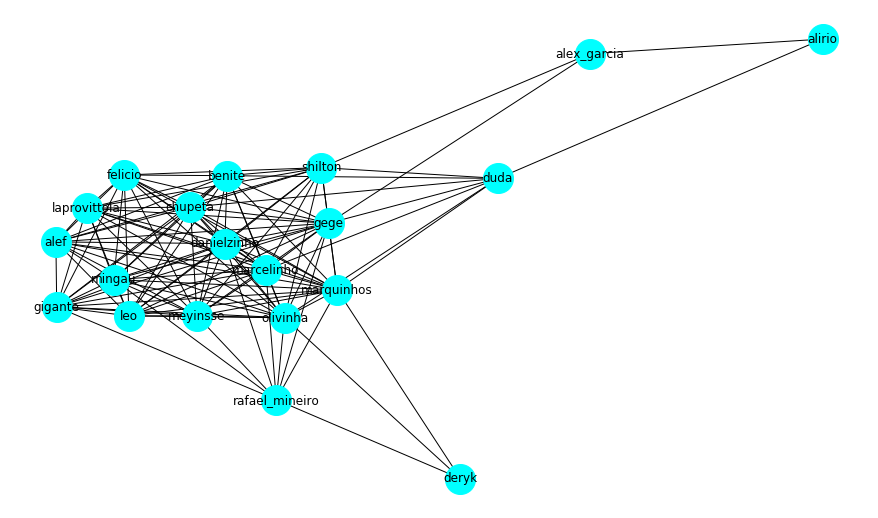

In [77]:
#create a subgraph
plt.figure(figsize = (12,7))
sub = g.subgraph(highest_degree)
nx.draw(sub,with_labels=True, node_color = 'cyan', node_size = 900)

In [78]:
highest_degree

['alef',
 'felicio',
 'gigante',
 'laprovittola',
 'leo',
 'mingau',
 'rafael_mineiro',
 'alirio',
 'deryk',
 'duda',
 'alex_garcia',
 'danielzinho',
 'meyinsse',
 'benite',
 'chupeta',
 'shilton',
 'marcelinho',
 'gege',
 'marquinhos',
 'olivinha']

In [79]:
lowest_degree = [node[0] for node in degree_sorted[:20]]

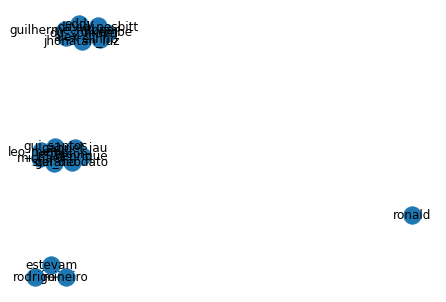

In [80]:
sub_low = g.subgraph(lowest_degree)
nx.draw(sub_low,with_labels=True)

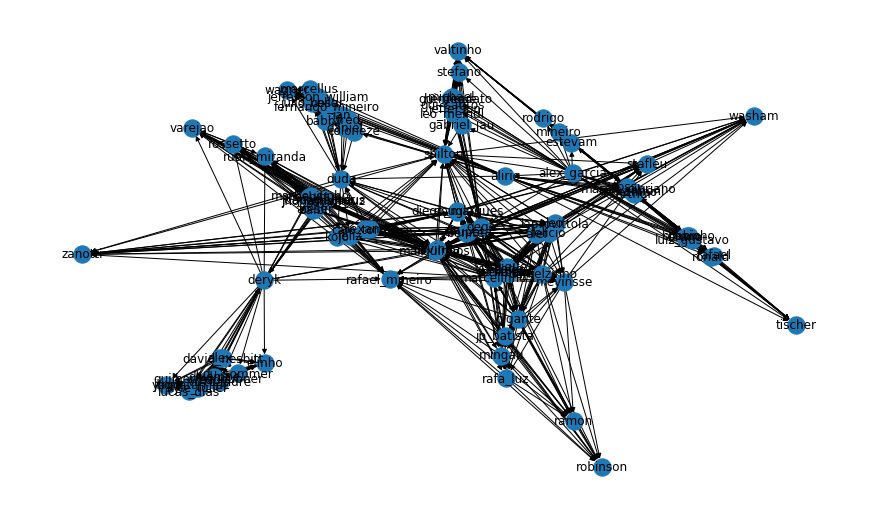

In [82]:
# create a digraph
d = nx.DiGraph()
plt.figure(figsize = (12,7))
d.add_edges_from(pairs)
nx.draw(d,with_labels=True)

In [83]:
#get the in_degree_centrality , and out_degree_centrality

in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = centrality_sort(in_degree_centrality)

print('---------------------- in degree Centrality--------------------------')
print('Highest degree:',in_degree_sorted[-5:])
print('\n')

print('Lowest degree:',in_degree_sorted[:5])


#out_degree centrality
out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = centrality_sort(out_degree_centrality)

print('---------------------- out degree Centrality--------------------------')
print('Highest degree:',out_degree_sorted[-5:])
print('\n')

print('Lowest degree:',out_degree_sorted[:5])

---------------------- in degree Centrality--------------------------
Highest degree: [('valtinho', 0.19999999999999998), ('marcelinho', 0.23157894736842105), ('shilton', 0.28421052631578947), ('marquinhos', 0.3157894736842105), ('olivinha', 0.3684210526315789)]


Lowest degree: [('aieser', 0.0), ('alef', 0.0), ('alex', 0.0), ('alex_garcia', 0.0), ('alexandre', 0.0)]
---------------------- out degree Centrality--------------------------
Highest degree: [('danielzinho', 0.25263157894736843), ('alirio', 0.25263157894736843), ('benite', 0.28421052631578947), ('gege', 0.28421052631578947), ('alex_garcia', 0.28421052631578947)]


Lowest degree: [('varejao', 0.0), ('washam', 0.0), ('yago', 0.0), ('tischer', 0.0), ('valtinho', 0.0)]


In [84]:
highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]

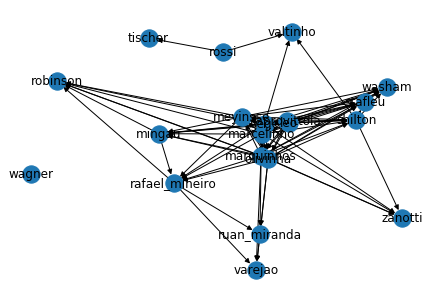

In [85]:
sub = d.subgraph(highest_in_degree)
nx.draw(sub,with_labels=True)

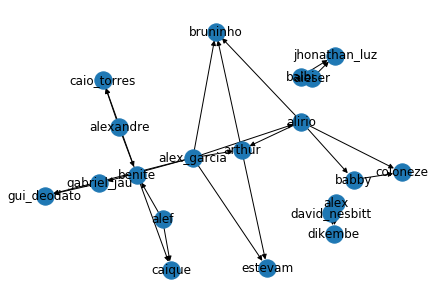

In [86]:
lowest_in_degree = [node[0] for node in in_degree_sorted[:20]]
sub1 = d.subgraph(lowest_in_degree)
nx.draw(sub1,with_labels=True)

In [87]:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]
lowest_out_degree = [node[0] for node in out_degree_sorted[:20]]

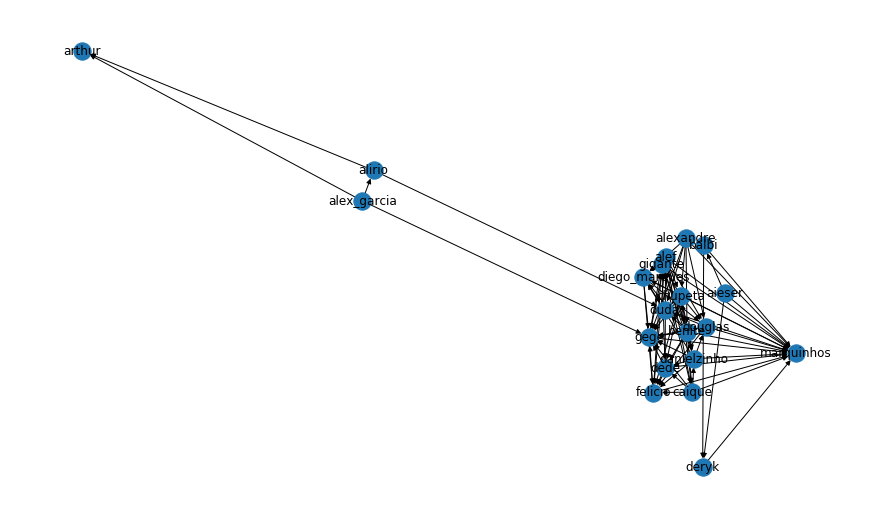

In [88]:
#plot highest out degree
plt.figure(figsize = (12,7))
sub = d.subgraph(highest_out_degree)
nx.draw(sub,with_labels=True)

In [89]:
highest_out_degree

['balbi',
 'dede',
 'gigante',
 'aieser',
 'felicio',
 'alexandre',
 'douglas',
 'arthur',
 'marquinhos',
 'caique',
 'diego_marques',
 'duda',
 'deryk',
 'alef',
 'chupeta',
 'danielzinho',
 'alirio',
 'benite',
 'gege',
 'alex_garcia']

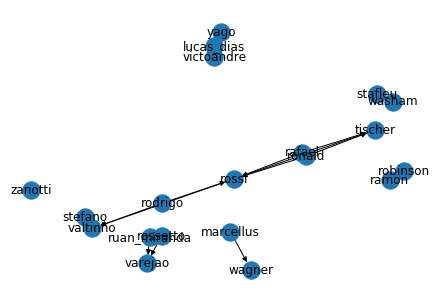

In [90]:
#plot lowest out degree
sub12 = d.subgraph(lowest_out_degree)
nx.draw(sub12,with_labels=True)

## Delete specific edges{(A,B),(A,C)} from G

In [140]:
tupla = [('Alírio','Chupeta'),('Hélio','Chupeta'),('Wagner','Chupeta'),('F.Mineiro','Chupeta'),('Fred','Chupeta'),
         ('Duda','Chupeta'),('Marcellus','Chupeta'),('J.Cesar','Chupeta'),('Daniel','Chupeta'),('J.William','Chupeta'),
         ('Ian','Chupeta'),('Coloneze','Chupeta'),('Babby','Chupeta'),('Arthur','Lula'),('Estevam','Lula'),
         ('Valtinho','Lula'),('A.Garcia','Lula'),('Giovannoni','Lula'),('Rodrigo','Lula'),('Rossi','Lula'),
         ('Nezinho','Lula'),('M.Cipriano','Lula'),('Mineiro','Lula'),('Arthur','J.Vidal'),('L.Gustavo','J.Vidal'),
         ('Fabio','J.Vidal'),('A.Garcia','J.Vidal'),('Giovannoni','J.Vidal'),('Rafael','J.Vidal'),('Rossi','J.Vidal'),
         ('Nezinho','J.Vidal'),('Bruninho','J.Vidal'),('M.Cipriano','J.Vidal'),('Bruno','J.Vidal'),('Alírio','J.Vidal'),
         ('Tischer','J.Vidal'),('Arthur','J.Vidal'),('Ronald','J.Vidal'),('Fabio','J.Vidal'),('A.Garcia','J.Vidal'),
         ('Giovannoni','J.Vidal'),('Rossi','J.Vidal'),('Nezinho','J.Vidal'),('Bruninho','J.Vidal'),
         ('M.Cipriano','J.Vidal'),('Bruno','J.Vidal'),('Alírio','J.Vidal'),('Tischer','J.Vidal'),('Marcelinho','J.Neto'),
         ('Feliz','J.Neto'),('Shilton','J.Neto'),('Kojo','J.Neto'),('Benite','J.Neto'),('Chupeta','J.Neto'),
         ('Duda','J.Neto'),('Marquinhos','J.Neto'),('D.Marques','J.Neto'),('C.Torres','J.Neto'),('Alexandre','J.Neto'),
         ('Olivinha','J.Neto'),('Gege','J.Neto'),('Douglas','J.Neto'),('Zanotti','J.Neto'),('Marcelinho','J.Neto'),
         ('Danielzinho','J.Neto'),('Shilton','J.Neto'),('Laprovittola','J.Neto'),('Benite','J.Neto'),
         ('Chupeta','J.Neto'),('Marquinhos','J.Neto'),('D.Marques','J.Neto'),('Leo','J.Neto'),('Washam','J.Neto'),
         ('Olivinha','J.Neto'),('Alef','J.Neto'),('Gege','J.Neto'),('Douglas','J.Neto'),('Felicio','J.Neto'),
         ('Stafleu','J.Neto'),('Meyinsse','J.Neto'),('Hermann','J.Neto'),('Marcelinho','J.Neto'),('Danielzinho','J.Neto'),
         ('Laprovittola','J.Neto'),('Benite','J.Neto'),('Chupeta','J.Neto'),('Dede','J.Neto'),('Marquinhos','J.Neto'),
         ('Diego','J.Neto'),('Leo','J.Neto'),('Olivinha','J.Neto'),('Alef','J.Neto'),('Gege','J.Neto'),
         ('Felicio','J.Neto'),('Fernando','J.Neto'),('Mingau','J.Neto'),('Caique','J.Neto'),('Gigante','J.Neto'),
         ('Meyinsse','J.Neto'),('Marcelinho','J.Neto'),('R.Luz','J.Neto'),('Gigante','J.Neto'),('Ramon','J.Neto'),
         ('Marquinhos','J.Neto'),('R.Mineira','J.Neto'),('JP.Batista','J.Neto'),('Danielzinho','J.Neto'),
         ('Olivinha','J.Neto'),('Gege','J.Neto'),('Mingau','J.Neto'),('Robinson','J.Neto'),('Meyinsse','J.Neto'),
         ('G.Deodato','Demétrius'),('Shilton','Demétrius'),('Stefano','Demétrius'),('Valtinho','Demétrius'),
         ('A.Garcia','Demétrius'),('Jefferson','Demétrius'),('Henrique','Demétrius'),('Michael','Demétrius'),
         ('Gege','Demétrius'),('G.Santos','Demétrius'),('L.Meindl','Demétrius'),('G.Jau','Demétrius'),
         ('Meyinsse','Demétrius'),('Yago','G.Conti'),('Elinho','G.Conti'),('J.Luz','G.Conti'),('L.Dias','G.Conti'),
         ('V.Andre','G.Conti'),('K.Fuller','G.Conti'),('Alex','G.Conti'),('D.Sommer','G.Conti'),('Deryk','G.Conti'),
         ('Dikembe','G.Conti'),('D.Nesbitt','G.Conti'),('Eddy','G.Conti'),('G.Hubner','G.Conti'),('Balbi','G.Conti'),
         ('Rossetto','G.Conti'),('Matheusinho','G.Conti'),('J.Matheus','G.Conti'),('Deryk','G.Conti'),
         ('Kevin','G.Conti'),('Marquinhos','G.Conti'),('J.Luz','G.Conti'),('Aieser','G.Conti'),('Olivinha','G.Conti'),
         ('Nesbitt','G.Conti'),('R.Miranda','G.Conti'),('Varejao','G.Conti'),('R.Mineiro','G.Conti'),('J.Vitor','G.Conti')]

In [168]:
# define our function called simple_graph()
def simple_graph():
    #create our empty graph
    G = nx.Graph(tupla)
    
    #draw the graph
    nx.draw(G, with_labels=True,node_color='c',node_size=900)
    
    #define the nodelist
    nodelist = ['G.Conti','J.Neto','Demétrius','Lula','J.Vidal']

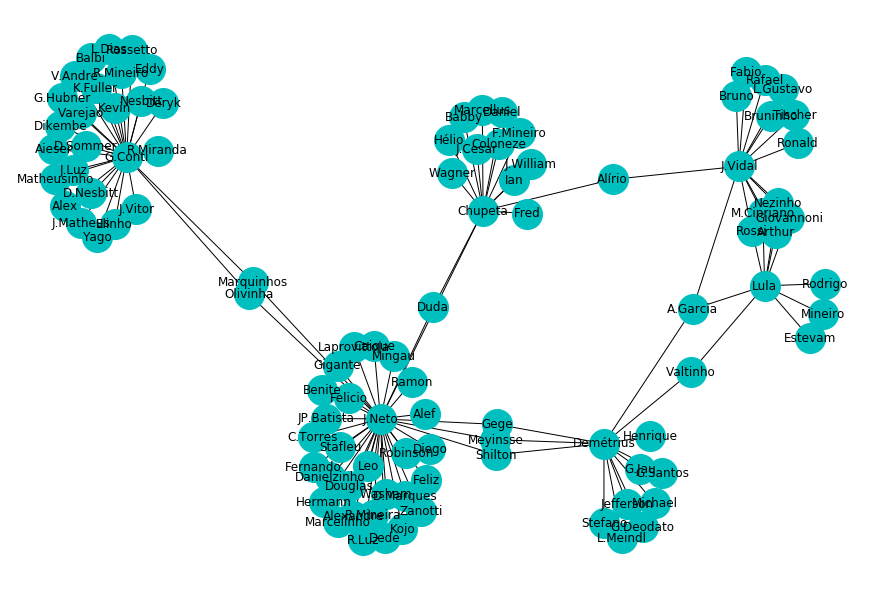

In [171]:
# call simple_graph function
plt.figure(figsize = (12,8))
simple_graph()